<a href="https://colab.research.google.com/github/SeanRommes/Use-CDF-to-calculate-probabilities-practice-/blob/main/Use_CDF_to_Calculate_Probabilities_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo Course Work/project downloads/weight-height - weight-height.csv')
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
data = females['Height']

In [4]:
#defining high and low end
low_end = 55.0
high_end = 56.0


In [5]:
# Defining descriptive stats

mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [6]:
mean

63.708773603458006

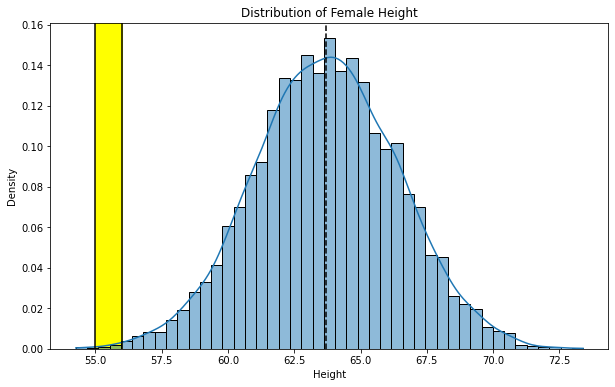

In [17]:
#plot interested range

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvline(mean,color='black', ls = '--')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [8]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [9]:
# defining cdf

cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

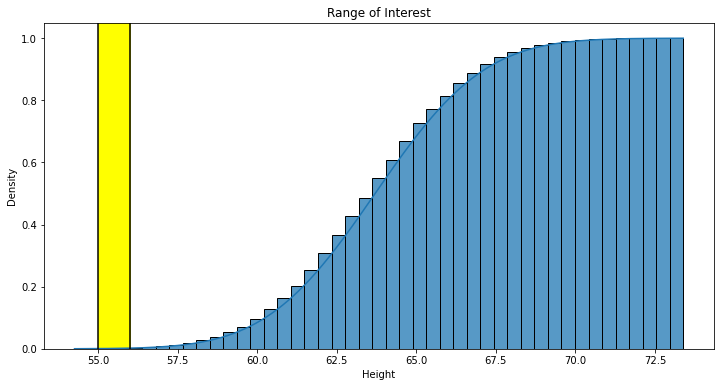

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [11]:
# we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)


0.0015043054289559745

according to the data there is a less than 1%(.0015) chance that an adult women is between 55 and 56 inches in height

In [12]:
# getting probability of height being less than 5 ft (60 inches)
stats.norm.cdf(60, loc=mean,scale=std)

0.0844649272520746

there's an 8% chance that a womans height will be less than 5 ft

In [14]:
# getting probability of height being greater than the mean
1 -stats.norm.cdf(mean, loc=mean,scale=std)

0.5

there's a 50% chance that a womans height will be greter than our mean